In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
genes=['gene'+str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]

In [5]:
df=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [7]:
for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [8]:
df

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,30,34,37,23,30,130,118,125,125,109
gene2,757,779,751,752,751,675,713,715,697,721
gene3,666,653,700,657,705,851,883,895,883,888
gene4,88,81,101,87,98,215,238,220,235,220
gene5,434,422,435,422,421,737,741,691,691,740
...,...,...,...,...,...,...,...,...,...,...
gene96,794,772,798,785,792,401,448,432,399,451
gene97,88,96,103,89,91,809,781,808,773,748
gene98,476,471,493,483,541,319,309,317,314,312
gene99,940,976,905,1005,983,694,644,629,677,620


In [14]:
df.shape

(100, 10)

In [15]:
scaled_data=preprocessing.scale(df.T)

In [16]:
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [18]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]

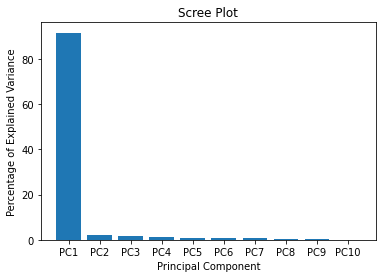

In [19]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [20]:
pca_df=pd.DataFrame(pca_data,index=[*wt, *ko],columns=labels)

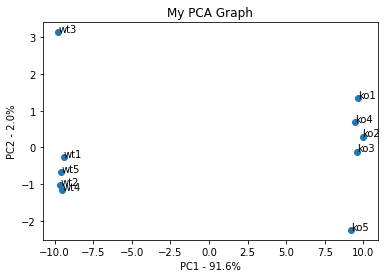

In [21]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [22]:
# Determine which genes had the biggest influence on PC1
# get the name of the top 10 measurements (genes) that contribute
# most to pc1.
# first, get the loading scores
loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

In [23]:
top_ten_genes=sorted_loading_scores[0:10].index.values
print(loading_scores[top_ten_genes])

gene12   -0.104462
gene35   -0.104410
gene18   -0.104406
gene21    0.104404
gene87    0.104399
gene57   -0.104393
gene83    0.104392
gene32   -0.104391
gene48   -0.104390
gene97    0.104375
dtype: float64
